<a href="https://colab.research.google.com/github/Asthamukhia/ML---Fraud-Detection/blob/main/ML_Fraud_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Fraud Detection**

### **Project Type - Classification**

### **Contribution - Individual**
### **Name - Astha Mukhia**

# **Project Summary -**

**Credit card fraud detection systems employ sophisticated algorithms and techniques to safeguard financial transactions by identifying potentially fraudulent activity. These systems rely on an array of factors, including user behavior and location analysis, to detect anomalies and protect users from unauthorized transactions.**

**One of the crucial elements in credit card fraud detection is the examination of user behavior patterns. By analyzing a user's spending habits and transaction history, the system can establish a baseline for their typical financial activity. This baseline includes details such as the types of transactions they commonly make, the merchants they frequent, and the amounts they usually spend. Any deviation from this established pattern can raise a red flag. The project summary provided outlines the importance of detecting online payment fraud and highlights the use of machine learning with Python for this purpose. Here's a more detailed breakdown of the key components of such a project: online payment fraud detection in the context of online payment systems and credit card companies. Challenges in Online Payment Fraud Detection: Discussing the challenges and risks associated with online payment fraud, such as stolen credit card information, identity theft, and unauthorized transactions. In addition to monitoring user behavior, credit card fraud detection systems also take into account geographical data. They track the locations where a user typically conducts transactions, including the cities or countries they frequent. If a transaction occurs in an unusual geographic location, it can be considered suspicious. For instance, if a user primarily makes purchases in their home city but a transaction is initiated from a distant location, it may trigger suspicion.**

## **GitHub Link -**

https://github.com/Asthamukhia/ML---Fraud-Detection

## **Problem Statement-**

### **Clearly state the project's objective, which is to develop a fraud detection system using machine learning and Python to protect customers from fraudulent transactions.**

# **Let's Begin !**

### **1. Know Your Data**

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

**Dataset Loading**

In [3]:
df = pd.read_csv('/content/onlinefraud.csv')

## **Dataset First View**

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## **Dataset Rows & Columns count**

In [10]:
df.shape

(124457, 11)

In [12]:
df.type.value_counts()

PAYMENT     48078
CASH_OUT    39349
CASH_IN     25209
TRANSFER    10650
DEBIT        1171
Name: type, dtype: int64

## **Dataset Information**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124457 entries, 0 to 124456
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            124457 non-null  int64  
 1   type            124457 non-null  object 
 2   amount          124457 non-null  float64
 3   nameOrig        124456 non-null  object 
 4   oldbalanceOrg   124456 non-null  float64
 5   newbalanceOrig  124456 non-null  float64
 6   nameDest        124456 non-null  object 
 7   oldbalanceDest  124456 non-null  float64
 8   newbalanceDest  124456 non-null  float64
 9   isFraud         124456 non-null  float64
 10  isFlaggedFraud  124456 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.4+ MB


## **Duplicate Values**

In [14]:
df.duplicated().sum()

0

In [15]:
data_types = df.dtypes

print(data_types)
print(df['nameDest'].dtype)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object
object


## **Missing Values/Null Values**

In [16]:
missing_value= df.isnull().sum()
print(missing_value)

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


## **Visualising missing value**

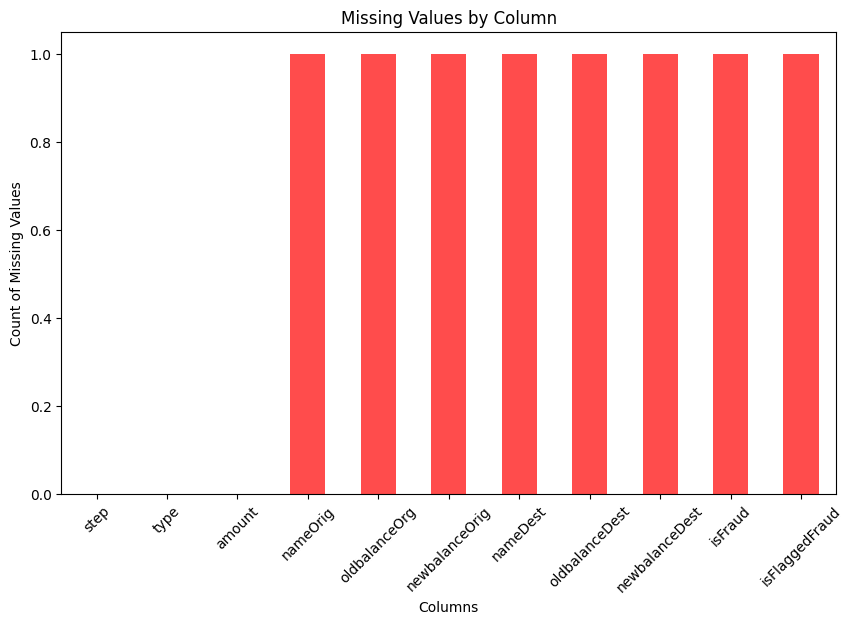

In [17]:
plt.figure(figsize=(10, 6))
missing_value.plot(kind='bar', color='red', alpha=0.7)
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

# **2. Understanding Your Variables**

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## **Dataset Describe**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,124457.0,8.920945e+00,1.857028e+00,1.00,8.00,9.000,1.000000e+01,11.00
amount,124457.0,1.773613e+05,3.440304e+05,0.32,10597.26,57852.590,2.180569e+05,10000000.00
oldbalanceOrg,124456.0,9.047501e+05,2.850751e+06,0.00,0.00,20093.000,1.952794e+05,38939424.03
newbalanceOrig,124456.0,9.209941e+05,2.887776e+06,0.00,0.00,0.000,2.222311e+05,38946233.02
oldbalanceDest,124456.0,9.004621e+05,2.391423e+06,0.00,0.00,28306.315,6.424462e+05,34008736.98
newbalanceDest,124456.0,1.185246e+06,2.749984e+06,0.00,0.00,75273.650,1.097218e+06,38946233.02
isFraud,124456.0,9.641962e-04,3.103666e-02,0.00,0.00,0.000,0.000000e+00,1.00
isFlaggedFraud,124456.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.000000e+00,0.00


In [21]:
# Check Unique Values for each variable.
import pandas as pd

def check_unique_values(dataset, features):
    for feature in features:
        unique_values = dataset[feature].unique()
        print(f"Unique values for '{feature}':")
        print(unique_values)
        print("\n")

# Assuming you have a Pandas DataFrame 'df' representing your dataset
# and 'features' is the list of features you want to check
features_to_check = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                     'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Call the function with your dataset and list of features
check_unique_values(df, features_to_check)


Unique values for 'step':
[ 1  2  3  4  5  6  7  8  9 10 11]


Unique values for 'type':
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


Unique values for 'amount':
[ 9839.64  1864.28   181.   ...  9495.13  6644.65 82501.87]


Unique values for 'nameOrig':
['C1231006815' 'C1666544295' 'C1305486145' ... 'C516667550' 'C244871179'
 nan]


Unique values for 'oldbalanceOrg':
[170136.    21249.      181.   ...  95761.29  71316.72       nan]


Unique values for 'newbalanceOrig':
[160296.36  19384.72      0.   ...  71316.72  61821.6        nan]


Unique values for 'nameDest':
['M1979787155' 'M2044282225' 'C553264065' ... 'M373322484' 'M600628263'
 nan]


Unique values for 'oldbalanceDest':
[      0.     21182.     41898.   ... 2769469.59 2956570.48        nan]


Unique values for 'newbalanceDest':
[      0.     40348.79  157982.12 ...   89571.34 1437891.23        nan]


Unique values for 'isFraud':
[ 0.  1. nan]


Unique values for 'isFlaggedFraud':
[ 0. nan]




<Axes: >

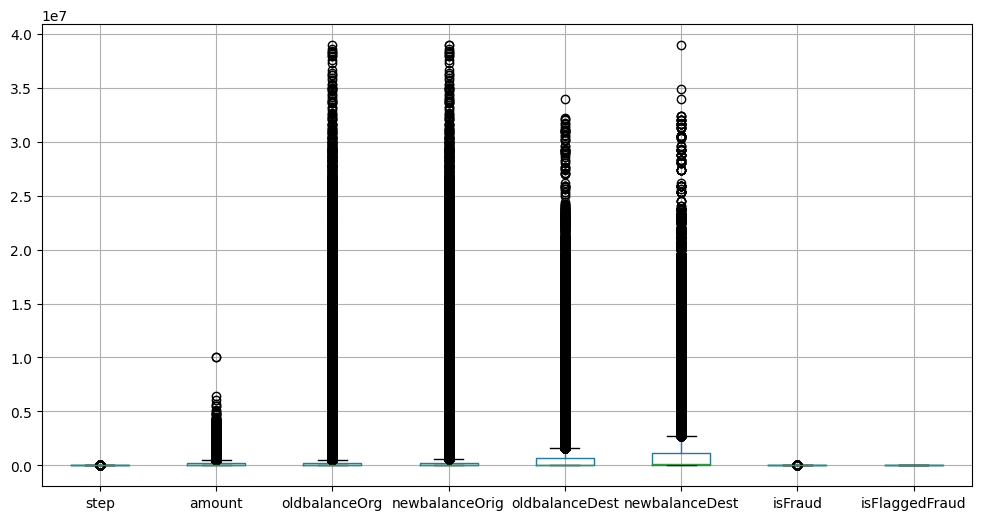

In [22]:
df.boxplot(figsize=(12,6))

In [25]:
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 3.89%
Column: amount, Percentage of outliers: 6.32%
Column: oldbalanceOrg, Percentage of outliers: 18.22%
Column: newbalanceOrig, Percentage of outliers: 17.45%
Column: oldbalanceDest, Percentage of outliers: 13.89%
Column: newbalanceDest, Percentage of outliers: 12.11%
Column: isFraud, Percentage of outliers: 0.10%


In [26]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [27]:
low_leadtime,high_leadtime=remove_outlier(df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']>high_leadtime,high_leadtime,df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']<low_leadtime,low_leadtime,df['newbalanceOrig'])

In [28]:
low_leadtime,high_leadtime=remove_outlier(df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']>high_leadtime,high_leadtime,df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']<low_leadtime,low_leadtime,df['newbalanceDest'])

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Text(0.5, 1.0, 'Distribution of Transaction Types')

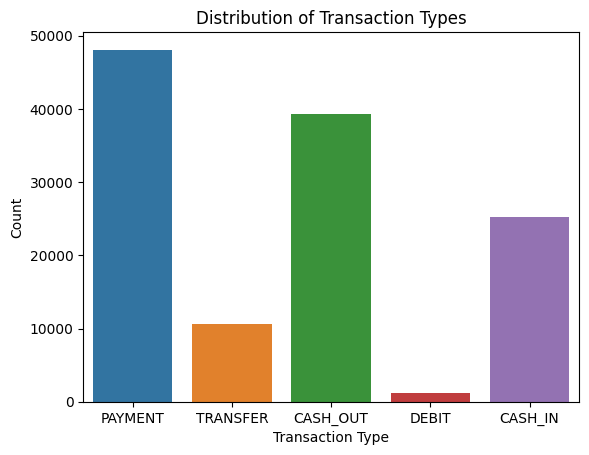

In [31]:
# Distribution of Transaction Types
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')

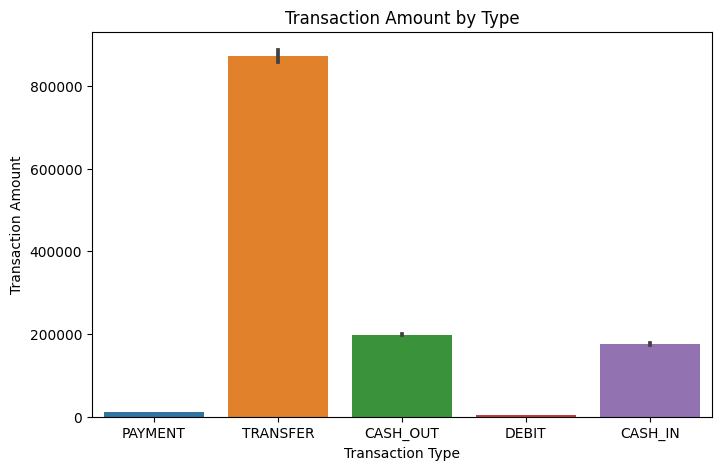

In [32]:
# the highest transaction amount is transfered by TRANSFER type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

In [34]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

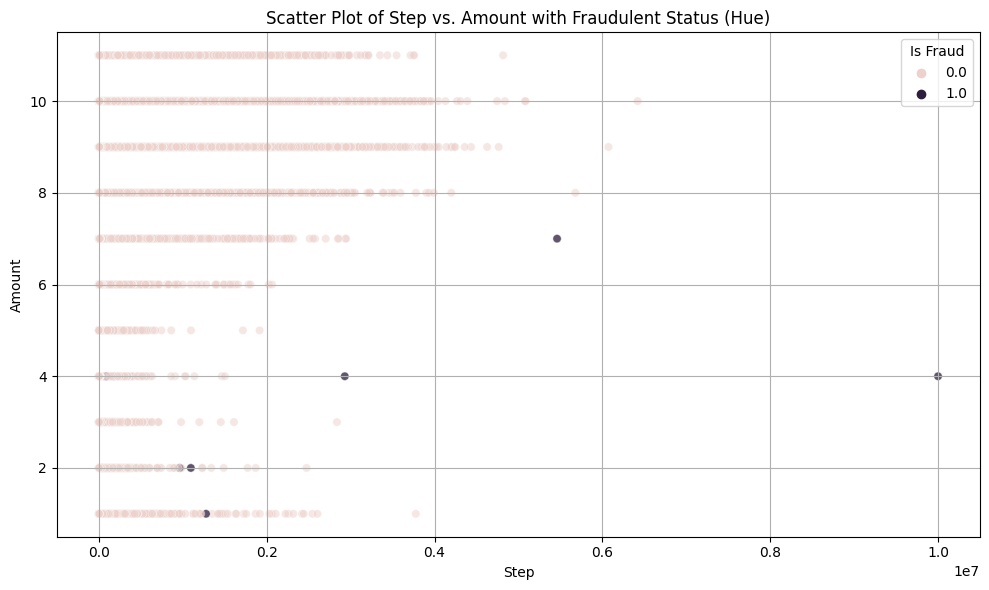

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

**Heatmap**

<ipython-input-36-787941b06462>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



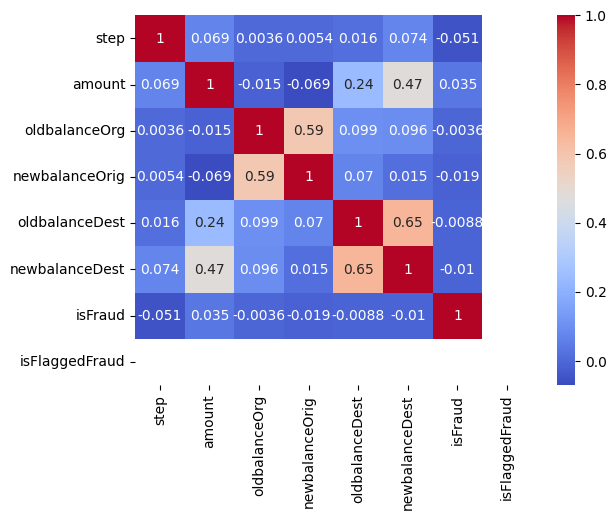

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

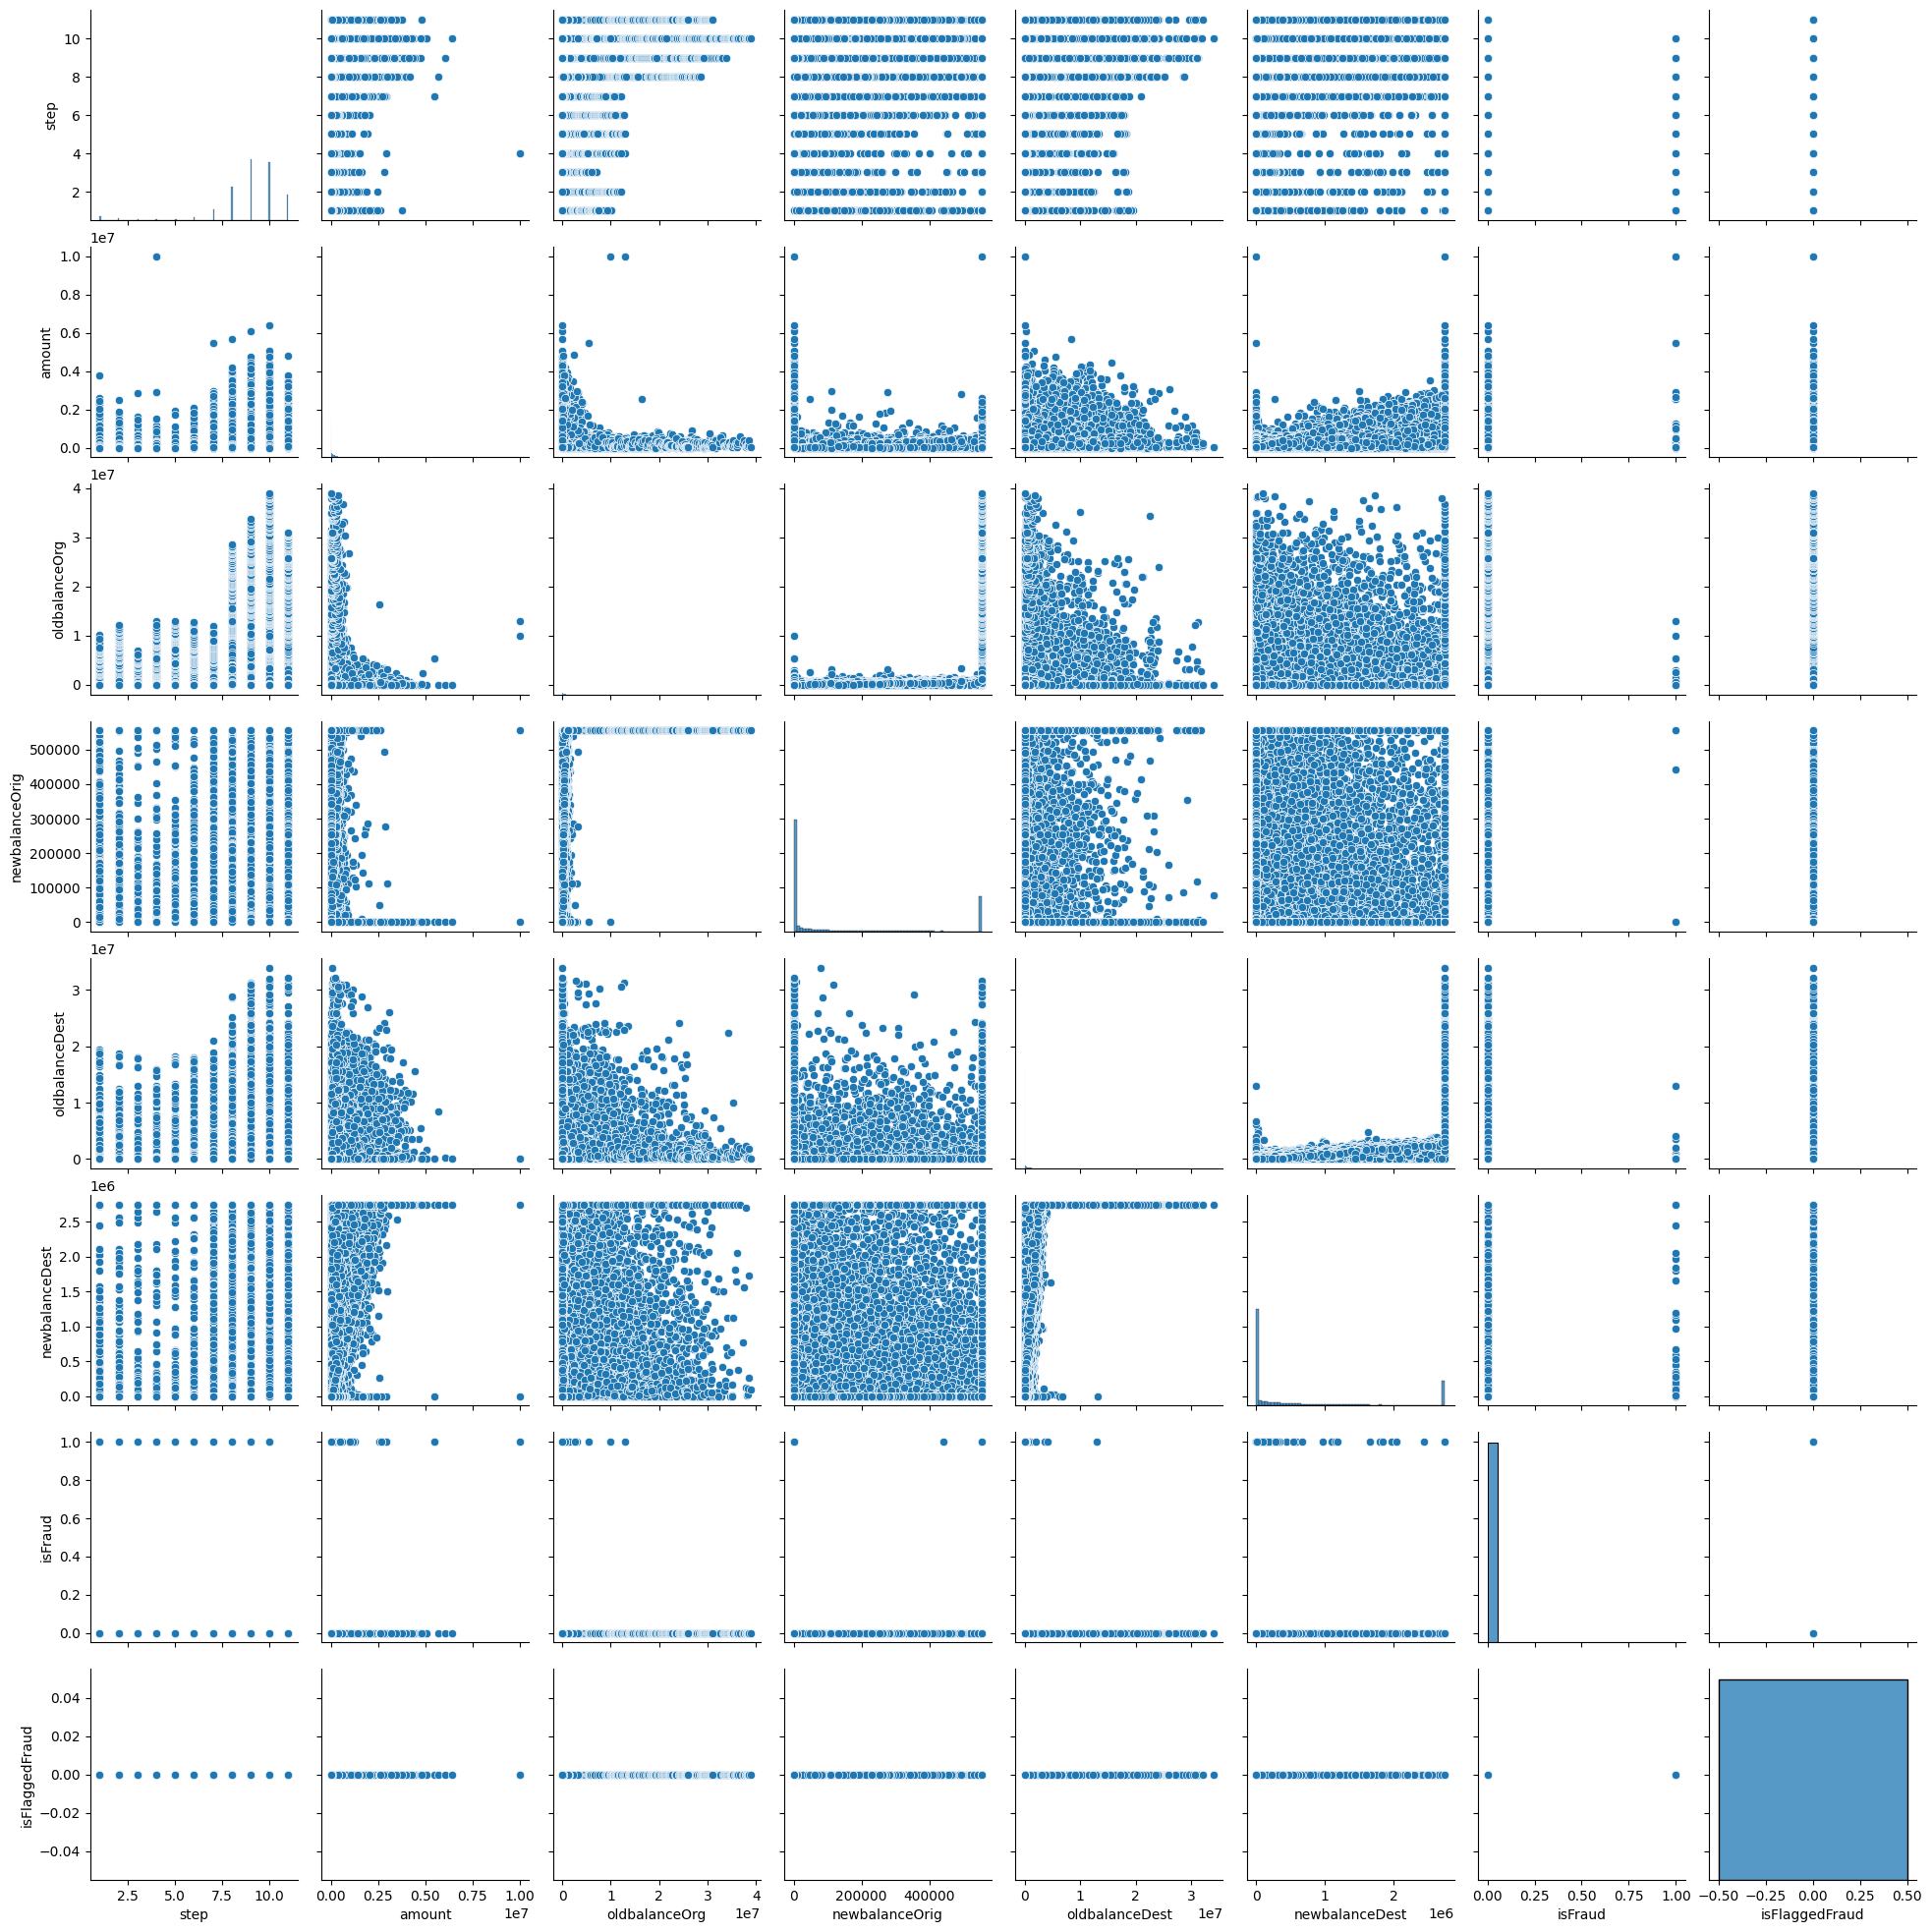

In [37]:
sns.pairplot(df)
plt.show()

## **Feature Engineering & Data Pre-processing**

**Data Preprocessing: Describe the preprocessing steps, which may include data cleaning, feature selection, normalization, and handling missing values.**

**Feature Engineering: Discuss the creation of relevant features from the raw data that can help improve the model's accuracy in detecting fraud.**

## **Missing Value handling**

In [39]:
df.dropna(inplace=True)

In [42]:
def check_missing_values(df):
     missing_values = df.isnull().sum()
     missing_info = pd.DataFrame({'Column Name': df.columns, 'MissingValues': missing_values})
     return missing_info


missing_info = check_missing_values(df)
print(missing_info)

                   Column Name  MissingValues
step                      step              0
type                      type              0
amount                  amount              0
nameOrig              nameOrig              0
oldbalanceOrg    oldbalanceOrg              0
newbalanceOrig  newbalanceOrig              0
nameDest              nameDest              0
oldbalanceDest  oldbalanceDest              0
newbalanceDest  newbalanceDest              0
isFraud                isFraud              0
isFlaggedFraud  isFlaggedFraud              0


## **Imputation**

In [43]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

## **Correlation**

In [44]:
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.035281
oldbalanceOrg    -0.003552
oldbalanceDest   -0.008841
newbalanceDest   -0.010187
newbalanceOrig   -0.018866
step             -0.050677
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


<ipython-input-44-0d92922c71bb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [46]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud             0.0  
1  M2044282225             0.0             0.0  No Fraud             0.0  
2   C553264065             0.0             0.0     Fraud             0.0  
3    C38997010         21182.0             0.0     Fraud             0.0  
4  M1230701703             0.0             0.0  No Fraud             0.0  


## **Encoding**

In [47]:
data_new = pd.get_dummies(df, columns=['type'], prefix=['type'])
data_new.shape

(124456, 15)

In [48]:
# encoding 'nameOrig' and 'nameDest'
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data_new['nameOrig']=le.fit_transform(data_new['nameOrig'])
data_new['nameDest']=le.fit_transform(data_new['nameDest'])

In [49]:
# Highly imbalanced
data_new['isFraud'].value_counts()

No Fraud    124336
Fraud          120
Name: isFraud, dtype: int64

### **Model spliting**

### **Decision Tree classifier**

In [50]:
# splitting the da
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
data = df.dropna()
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

### **Model Fitting**

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

## **Model Scaling**

In [52]:
#scaling the data
sc=StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

In [53]:
#Accuracy
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9990358348063635


### **Metrics**

In [54]:
# Print a classification report for additional metrics
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

       Fraud       0.27      0.43      0.33         7
    No Fraud       1.00      1.00      1.00     12439

    accuracy                           1.00     12446
   macro avg       0.64      0.71      0.67     12446
weighted avg       1.00      1.00      1.00     12446



In [55]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


## **Conclusion**

Concluding a fraud detection analysis involves summarizing the findings and outcomes of the analysis. Here's a general structure for a conclusion in a fraud detection analysis:

Summary of Objectives: Begin by restating the objectives and goals of the fraud detection analysis. What were you trying to achieve with this analysis?

Key Findings: Highlight the main findings and insights from the analysis. This could include patterns, trends, or anomalies that were identified in the data.

Model Performance: Discuss the performance of any machine learning or statistical models that were used for fraud detection. Mention metrics such as accuracy, precision, recall, F1-score, and ROC AUC, if applicable.

False Positives and Negatives: Address the issue of false positives and false negatives. Discuss how the model's performance impacts the business or organization and whether there are strategies to mitigate these errors.

Recommendations: Provide recommendations based on the analysis. This may include suggestions for improving the fraud detection system, implementing additional features or data sources, or refining the model.

Next Steps: Outline the next steps or actions that should be taken based on the analysis. This could involve further data collection, model retraining, or implementing real-time monitoring.

Limitations: Acknowledge any limitations of the analysis. This might include constraints due to data availability, assumptions made during the analysis, or potential sources of bias.

Future Research: Mention any areas for future research or analysis related to fraud detection that were identified during this project.

Final Thoughts: Summarize the importance of fraud detection in the context of the organization and emphasize the need for ongoing vigilance in monitoring and preventing fraudulent activities.

Closing Remarks: End the conclusion with closing remarks or any key takeaways from the analysis.